In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
train_data = pd.read_csv("data/train_set.csv")
test_data = pd.read_csv("data/test_set.csv")
train_data.head()

,A,P,sigma,kappa,I_kA,B_T,mark
0,0.01,0.10000,0.18,1.95,300.0,0.7,0
1,0.01,0.18947,0.18,1.95,300.0,0.7,0
2,0.01,0.27895,0.18,1.95,300.0,0.7,0
3,0.01,0.36842,0.18,1.95,300.0,0.7,0
4,0.01,0.45789,0.18,1.95,300.0,0.7,0


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_data.drop(["mark"], axis=1).to_numpy(), test_data.drop(["mark"], axis=1).to_numpy(), train_data["mark"].to_numpy(), test_data["mark"].to_numpy()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1725, 6) (875, 6) (1725,) (875,)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import time

In [89]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, 
                                n_estimators=200, random_state=42)
# grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='roc_auc')

print("Fitting RFC...")
start_tic = time.time()
clf_rf.fit(X_train_, y_train_)
print(f"Fitting takes: {(time.time() - start_tic):.3f} s")

# Get the best classifier from the grid search
# best_clf_rf = grid_search.best_estimator_

# Make predictions
y_pred_proba = clf_rf.predict_proba(X_test_)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_, y_pred_proba)
print("ROC AUC Score:", roc_auc)

Fitting RFC...
Fitting takes: 0.408 s
ROC AUC Score: 0.9939713515999737


In [10]:
# grid_search.best_params_

# {'max_depth': 10,
#  'min_samples_leaf': 4,
#  'min_samples_split': 10,
#  'n_estimators': 200}

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [5]:
clf_linear = make_pipeline(StandardScaler(), SVC(kernel="linear", probability=True, random_state=42))
clf_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True, random_state=42))
clf_poly = make_pipeline(StandardScaler(), SVC(kernel="poly", probability=True, random_state=42))

In [86]:
print("Fitting RBF SVM...")
start_tic = time.time()
clf_rbf.fit(X_train_, y_train_)
print(f"Fitting takes: {(time.time() - start_tic):.3f} s")

print("Pedicting...")
y_pred_proba = clf_rbf.predict_proba(X_test_)[:, 1]

roc_auc = roc_auc_score(y_test_, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print("-----")

# print("Fitting Poly SVM...")
# start_tic = time.time()
# clf_poly.fit(X_train, y_train)
# print(f"Fitting takes: {(time.time() - start_tic):.3f} s")

# print("Pedicting...")
# y_pred_proba = clf_poly.predict_proba(X_test)[:, 1]

# roc_auc = roc_auc_score(y_test, y_pred_proba)
# print("ROC AUC Score:", roc_auc)
# print("-----")

# print("Fitting Linear SVM...")
# start_tic = time.time()
# clf_linear.fit(X_train, y_train)
# print(f"Fitting takes: {(time.time() - start_tic):.3f} s")

# print("Pedicting...")
# y_pred_proba = clf_linear.predict_proba(X_test)[:, 1]

# roc_auc = roc_auc_score(y_test, y_pred_proba)
# print("ROC AUC Score:", roc_auc)
# print("-----")

display = RocCurveDisplay.from_predictions(
    y_test_,
    y_pred_proba,
    color="darkorange")

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC curve:",
)

Fitting RBF SVM...
Fitting takes: 0.597 s
Pedicting...
ROC AUC Score: 0.9033362901636113
-----


In [83]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import RocCurveDisplay

clf_mlp = make_pipeline(StandardScaler(), 
                        MLPClassifier(hidden_layer_sizes=(256, 64), max_iter=1000, random_state=42))
# , early_stopping=True

X, y = np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test])

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

print("Fitting MLP Classifier...")
start_tic = time.time()
clf_mlp.fit(X_train_, y_train_)
print(f"Fitting takes: {(time.time() - start_tic):.3f} s")

print("Pedicting...")
y_pred_proba = clf_mlp.predict_proba(X_test_)[:, 1]

roc_auc = roc_auc_score(y_test_, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print("-----")

Fitting MLP Classifier...
Fitting takes: 3.935 s
Pedicting...
ROC AUC Score: 0.9931992903607333
-----


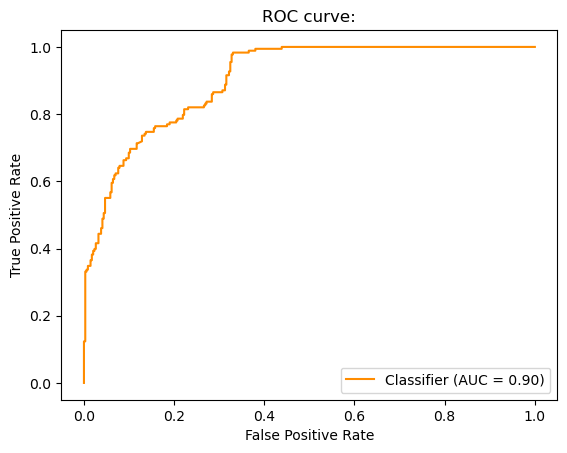

In [87]:
display = RocCurveDisplay.from_predictions(
    y_test_,
    y_pred_proba,
    color="darkorange")

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC curve:",
)

---

In [85]:
from joblib import dump

index = 3
dump(clf_mlp, f'../Modeling Piling-Ballon Mode/models/MLP_classifier_{index}.joblib')

['../Modeling Piling-Ballon Mode/models/MLP_classifier_3.joblib']

In [90]:
from joblib import dump

dump(clf_rf, 'models/RF_classifier_2.joblib')
# dump(clf_rbf, 'models/RBF-SVM_classifier_2.joblib')
# dump(clf_poly, 'models/Poly-SVM_classifier.joblib')
# dump(clf_linear, 'models/Linear-SVM_classifier.joblib')

['models/RF_classifier_2.joblib']